# Projet python 2A : évaluation de la valeure des footballeurs

César Fabiani - Mathis Lecoq

_Ce projet est réalisé dans le cadre du cours de Python de Lino Galiana pour l'année 2023-2024._

### Introduction

**Notre objectif** : Evaluer la valeur d'un joueur. Pour cela nous avons utilisé les données sur le site [**FB**REF](https://fbref.com/fr/) qui contiennent des données détaillés (buts, passes, etc) pour chaque joueur dans chaque match.

**Le projet** : Notre projet se décompose en N étapes : 
1. Extraction des données en scrappant le site [**FB**REF](https://fbref.com/fr/)
2. Identification des variables d'intérets
3. ...

### Structure du répertoire

À la racine du répertoire, on trouve :
- **`README.md`** : présentation détaillée du projet

### Installations et importations

La partie scrapping prenant beaucoup de temps pour éviter de se faire bloquer par le site, elle n'est pas incluse dans ce notebook. Vous pouvez la trouver dans le fichier **`scrapping`**.
Pour information, les installations et importations sont les suivantes :

In [1]:
!sudo apt-get install python3-pip python-dev
!pip install lxml

import bs4
import lxml
import urllib
import requests

from bs4 import BeautifulSoup
from urllib import request

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package python3-pip
E: Unable to locate package python-dev


De plus, on utilise le module **`time`** pour espacer les requêtes et le module **`json`** pour stocker les données recueillies : 

In [2]:
import json
import time

Pour traiter les données, nous avons utilisé les modules **`pandas`**, **`numpy`**, **`sklearn`** et **`matplotlib`** :

In [3]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

### Étape 1 : Extraction des données en scrappant le site [**FB**REF](https://fbref.com/fr/)

_Le code de la partie scraping ne se trouve pas dans le notebook car prennant trop de temps pour s'éxecuter. Vous pouvez le trouvez dans le dossier **`scraping`**.


Dans cette partie on donnera donc uniquement un exemple du scrap fait en appelant des fonctions du dossier **`scraping`**.
Les bases obtenues se trouvent dans le fichier **`data`**.

Notre logique vis à vis du scraping de FBREF a été de se concentrer sur les trois tags disponibles : le tag des équipes, le tag des matchs et le tag des joueurs. Chaque tag est unique (unique à un joueur, unique à un match etc.). Le tag n'est jamais disponible directement mais peut se retrouver dans le lien hypertexte d'une information.

De plus, notre volonté était d'obtenir les performances de chaque joueur à chaque match. Chaque ligne de notre base représente donc les statistiques d'un joueur sur un match et la base contient en tout (nombre total de matchs) * (nombre de joueurs par match) lignes.

De plus nous souhaitions nous concentrer sur un championnat donnée pour une année donnée. Cela nous donne une base suffisamment grande (plus de 11000 lignes) et cela évite de traiter les différences de comptabilisation des statistiques dans le temps et entre les pays.
On se concentrera donc sur la première ligue anglaise sur l'année 2022-2023

FBREF était le seul site où nous pouvions obtenir les informations de chaque joueur à chaque match, là où les autres sites ne proposent souvent que des statistiques d'un joueur sur une saison entière. De plus le site dispose de très nombreuses statistiques pour chaque joueur à chaque match (plus d'une centaine !).

Néanmoins, si FBREF accepte le scraping, on ne peut effectuer que 20 requêtes par minutes (sinon le banissement est d'une heure).




La première partie du scrap consistait donc à récupérer l'ensemble des tag de match sur une saison donnée pour un championnat donné.
Sur le site il existe des pages qui pour chaque date donne l'ensemble des matchs joués à cette date là. On peut donc y récupér les liens de journaux de matchs dont on extrait le tag dans l'url pour la ligue qui nous intéresse. L'url de ces pages qui donnent les matchs à chaque date est facile à utiliser et on peut facilement faire une boucle sur ces dates.

La fonction scraping de **`scraping_FBREF_1.py `** dans le dossier **`scraping`** permet, pour une date de début, une date de fin et une ligue, de récupérer les tags de tous les matchs sur cette période pour la ligue.

La liste des tag (380 pour une saison complète) est dans le fichier **`liste_url`** dans le dossier **`data`**




Ensuite nous avons créé une fonction scrap_match, qui étant donné un url de match, renvoie un dataframe panda avec sur chaque ligne les statistiques d'un joueur.
Le tableau des statistiques sur une url est divisé en plusieurs pages. Normalement il faut cliquer sur les différentes pages de statistiques pour les voir s'afficher. Mais nous avons pu scraper sans utiliser selenium car le code javascript permet juste de rendre visible tel ou tel tableau mais tous les tableaux sont de base présents dans le code html.
A chaque joueur nous associons également le tag de son équipe, ce qui servira par la suite

On donne ici l'exemple pour un match.



In [52]:
from scraping.scraping_match import scrap_match

url_Brighton = "https://fbref.com/fr/matchs/56a137f7/Brighton-and-Hove-Albion-Luton-Town-12-Aout-2023-Premier-League"
list_table = ["summary","passing","passing_types","defense","possession","misc"]

table_match = scrap_match(url_Brighton,list_table)
print(table_match)

                  Joueur Numéro de maillot   Nation Emplacement     Âge  \
0          Danny Welbeck                18  eng ENG          FW  32-259   
1          Evan Ferguson                28   ie IRL          FW  18-297   
2           Kaoru Mitoma                22   jp JPN          LW  26-084   
3            Solly March                 7  eng ENG          RW  29-023   
4          Simon Adingra                24   ci CIV          RW  21-223   
5             João Pedro                 9   br BRA          AM  21-320   
6     Julio César Enciso                10   py PAR          AM  19-201   
7         Mahmoud Dahoud                 8   de GER          DM  27-223   
8          Billy Gilmour                11  sct SCO          DM  22-062   
9            Pascal Groß                13   de GER          DM  32-058   
10      Pervis Estupiñán                30   ec ECU          LB  25-203   
11            Lewis Dunk                 5  eng ENG          CB  31-264   
12    Jan Paul van Hecke 

Enfin la fonction 

In [4]:
path = "data/data_premierleague_2022_2023_V2.csv"
df_FBREF = pd.read_csv(path)
df_FBREF.head()

,Unnamed: 0,Joueur,Numéro de maillot,Nation,Emplacement,Âge,Minutes,Buts,Passes décisives_x,Pénaltys marqués,...,Centres_y,Interceptions,Tacles réussis_y,Pénaltys réussis,Pénaltys concédés,But contre son camp,Récupérations de balle,Aerials Won,Aerials Lost,% of Aerials Won
0,0,Odsonne Édouard,22,fr FRA,FW,24-201,57,0,0,0,...,0,0,0,0,0,0,2,0,1,0.0
1,1,Jean-Philippe Mateta,14,fr FRA,FW,25-038,33,0,0,0,...,0,0,0,0,0,0,0,0,1,0.0
2,2,Wilfried Zaha,11,ci CIV,LW,29-268,90,0,0,0,...,4,0,2,0,0,0,9,0,0,NaN
3,3,Jordan Ayew,9,gh GHA,"RW,AM",30-328,90,0,0,0,...,4,0,1,0,0,0,4,2,3,40.0
4,4,Eberechi Eze,10,eng ENG,AM,24-037,85,0,0,0,...,5,0,1,0,0,0,5,1,2,33.3


Une fois la base de données obtenue, nous avons nettoyé la base afin d'obtenir des données sur lesquelles nous pouvons travailler. 

### Étape 2 : Scrapping du site Transfermarkt

In [5]:
path = "/home/onyxia/work/evaluation_football/data/tm.csv"
df_tm = pd.read_csv(path)
df_tm.columns = ['Joueur', 'Valeur', 'Date naissance']
print(df_tm.head())

          Joueur        Valeur     Date naissance
0        Ederson  40,00 mio. €  17 août 1993 (29)
1  Stefan Ortega   9,00 mio. €   6 nov. 1992 (30)
2   Zack Steffen   3,50 mio. €   2 avr. 1995 (28)
3   Scott Carson       200 K €  3 sept. 1985 (37)
4     Rúben Dias  80,00 mio. €   14 mai 1997 (26)


## Étape 3 : Nettoyage des données et fusion des deux bases

Ici il faut mettre ce qui est dans le cleaning pour clean la base FBref (notamment clarifier les positions, c'est le plus important car le modèle est bancal à cause de ça pour l'instant)+ il faut clean la base transfermarkt (transformer les valeurs qui sont en string en valeur numérique avec 30 mil qui devient 30 et 500k qui devient 0.5).

En suite on peut merge les deux bases en faisant un left join . Le code de ça est pour l'instant dans la partie modèle et est un peu brouillon je le 

Une fois ça fait ça nous crée notre base de travail. Je sais pas si on l'exporte ou non. En soit on peut la conserver dans le code pour la suite ou la save et la réouvrir ensuite

### 3.1 : Nettoyages des deux bases
Afin de pouvoir faire des statistiques et d'évaluer la valeur des footballeurs, nous devons nettoyer la base issue du site FBREF. Ce nettoyage comporte trois points.

Premièrement, nous devons rajouter à chaque ligne le nombre de point gagnés à l'issu du match (3 pour une victoire, 1 pour une égalité, 0 pour une défaite), pondéré par le temps que le joueur a passé à jouer.

In [6]:
df_FBREF["home"] = np.where(df_FBREF["id_team_A"] == df_FBREF["team tag"], True, False)

def points_gagnes(row):
    """
    This function determines wich teams won, or if there is an equality and return points accordingly.
    """
    if row["id_team_A"] == row["team tag"]:
        if row["score_team_A"] > row["score_team_B"]:
            return 3
        elif row["score_team_A"] == row["score_team_B"]:
            return 1
        else: 
            return 0
    else:
        if row["score_team_B"] > row["score_team_A"]:
            return 3
        elif row["score_team_B"] == row["score_team_A"]:
            return 1
        else:
            return 0

df_FBREF['pts_gagnes'] = df_FBREF.apply(points_gagnes, axis=1)


Ensuite nous devons simplifier les positions des joueurs, en effet pour évaluer la valeur d'un joueur, nous devons prendre en compte sa position (un défenseur n'a pas pour objectif de marquer des buts). Cependant il y a trop de position fournies par le site. Nous avons donc condensé les positions en seulement trois positions : attaquant, milieu, défenseur. Nous supprimons également les joueurs ayant le rôle de gardient de but qui est très différent des autres rôles. En effet, les statistiques que nous avons recoltées (passes réussies, duels aériens, ...) s'appliquent peu aux gardiens

De plus lors d'un match, lorsqu'un joueur a plusieurs positions renseignées, on conserve uniquement sa position principale, c'est-à-dire la deuxième.

On observe aussi dans la base qu'un joueur peut avoir des positions différentes selon les matchs mais cela ne crée pas de problème dans l'analyse.

In [7]:
# eliminate Goal Keepers
df_FBREF = df_FBREF.loc[df_FBREF['Emplacement'] != 'GK']

def positions(position):
    """
    This function is used to replace the position of each players by a simpler one.
    The only position left are : "Attaquant", "Défenseur" and "Milieu".
    """
    position = position[:2]
    if position in ['FW','LW','RW']:
        return 'Attaquant'
    elif position in ['DF','FB','LB','RB','CB','WB']:
        return 'Défenseur'
    elif position in ['MF','AM','DM','CM','LM','RM','WM']:
        return 'Milieu'

df_FBREF['Position'] = df_FBREF['Emplacement'].apply(positions)
df_FBREF[['Joueur','Position']].head(10)

,Joueur,Position
0,Odsonne Édouard,Attaquant
1,Jean-Philippe Mateta,Attaquant
2,Wilfried Zaha,Attaquant
3,Jordan Ayew,Attaquant
4,Eberechi Eze,Milieu
5,Malcolm Ebiowei,Attaquant
6,Jeffrey Schlupp,Milieu
7,Will Hughes,Milieu
8,Cheick Doucouré,Milieu
9,Luka Milivojević,Milieu


Ensuite nous devons nettoyer la base obtenue à partir du site Transfermarkt. Cela consiste simplement à remplacer les chaines de caractères correspondant au prix des joueurs en flotants. On conserve le prix en millions d'€.

In [8]:
# On supprime les joueurs sans valeur marchande car c'est principalement des joueurs sans temps de jeu ou à la retraite
df_tm = df_tm.loc[df_tm['Valeur'] != '-']

def str_to_float(str):
    """
    This function convert a string to a float.
    """
    L = str.split()
    L[0] = L[0].replace(",",".")
    if L[1]=='K':  #Quand le prix est de moins de 1 mio, il est sous la forme 600 K €
        return float(L[0])/1000
    elif L[1]=='mio.':
        return float(L[0])
    else :
        return None


df_tm['Valeur_Millions'] = df_tm['Valeur'].apply(str_to_float)
df_tm[['Joueur','Valeur_Millions']]

,Joueur,Valeur_Millions
0,Ederson,40.0
1,Stefan Ortega,9.0
2,Zack Steffen,3.5
3,Scott Carson,0.2
4,Rúben Dias,80.0
...,...,...
833,Antoine Semenyo,9.0
834,Jamal Lowe,1.5
835,Dominic Solanke,20.0
836,Kieffer Moore,4.0


### Etape 3.2 : Merge des deux bases


On réalise un left join (avec la base FBREF contenant les statistiques comme base left et la base TransferMarkt -TM- comme base right)
On choisit cette méthode car on va évaluer la performance des joueurs pour ensuite pouvoir la comparer à leur valeur. Les joueurs dont on peut obtenir la valeur mais qui ne sont pas présent sur FBRef (n'ayant  de statistiques car aucune minute de temps de jeu sur la saison 2022-2023) ne nous intéressent pas.

Dans un premier temps, on pensait que le merge, qui se fera sur le nom des joueurs -car les deux sites n'ont pas les mêmes id de joueurs- serait compliqué du fait des différentes manières d'enregistrer les noms.

Néanmoins nous avons observé que les deux bases avaient des nomenclatures assez identiques.

Nous réalisons ainsi le merge deux fois : une première avec les noms des joueurs tels que présents sur les deux sites
et un deuxième en enlevant les caratères spéciaux pour voir si l'appariement est meilleur.


On commence par créer une copie des deux bases. On supprime les caractères spéciaux des copies grâce à unicode

In [9]:
!pip install unidecode

In [10]:
from unidecode import unidecode
def accent_removal(row):
    return unidecode(row)

df_FBREF_copy= df_FBREF.copy()
df_tm_copy = df_tm.copy()

#On remplace les caractères spéciaux
df_FBREF_copy['Joueur_clear'] = df_FBREF_copy['Joueur'].apply(accent_removal)
df_tm_copy['Joueur_clear'] = df_tm_copy['Joueur'].apply(accent_removal)



On regarde déjà le nombre de joueurs uniques dans la base FBREF

In [11]:
len(df_FBREF['Joueur'].unique())

515

On réalise le left join pour les bases avec les caractères spéciaux

In [12]:
df_FBREF.set_index('Joueur', inplace= True)
df_tm.set_index('Joueur', inplace= True)
base_work_accent = pd.merge(df_FBREF, df_tm, how='left', left_index=True, right_index=True)

On compte le nombre de joueurs qui n'ont pas de valeurs attribuées

In [13]:
base_work_accent['Joueur'] = base_work_accent.index
base_work_accent = base_work_accent.reset_index(drop = True)

base_accent_agg = base_work_accent.groupby('Joueur').agg({'Valeur' : 'first'}).reset_index()
print(base_accent_agg['Valeur'].isna().sum())

58


On fait de même avec les bases sans caractères spéciaux

In [14]:
df_FBREF_copy.set_index('Joueur_clear', inplace= True)
df_tm_copy.set_index('Joueur_clear', inplace= True)
base_work = pd.merge(df_FBREF_copy, df_tm_copy, how='left', left_index=True, right_index=True)


In [15]:
base_work['Joueur'] = base_work.index
base_work = base_work.reset_index(drop = True)
base_agg = base_work.groupby('Joueur').agg({'Valeur' : 'first'}).reset_index()
print(base_agg['Valeur'].isna().sum())

39


On observe que même sans enlever les caractères spéciaux, le taux d'appariement est bon  : (515 - 58) / 515 = 89 %.
Mais il est encore meilleur en enlevant les caractères spéciaux : (515 - 39) / 515  = 92%.

Il faudrait un travail plus fin et plus long pour obtenir un meilleur appariement, mais ce taux est déjà amplement suffisant pour notre analyse

On conserve donc base_work comme base de travail pour la suite

### Étape 4 : Statistiques descriptives

Le but de notre modèle est de calculer l'impact d'une action (passe, tir, dribble,...) sur le match. Une fois son impact (positif ou négatif) calculé, nous pouvons en déduire la valeur d'un joueur en regardant le nombre de fois qu'un joueur va faire chaque action.

Pour les actions, nous allons conserver à priori toutes les actions "en jeu" (passe, tir,...) mais éliminer toutes les actions "hors jeu" (pénalty, corner,...). En effet tout joueur peut effectuer cette action et le choix ne démontre pas une meilleure qualité du joueur. Bien sur un joueur réalisant systématiquement ce genre d'action aura en réalité une meilleure valeur que ce qui est prédit dans le modèle. Mais il ne nous est pas possible d'en tenir compte.

Afin de voir qu'elles actions peuvent être considérés comme déterminantes pour déterminer la valeur un joueur, nous pouvons analyser la variance de chaque action en fonction des postes. Plus une action a une variance grande, plus elle nous permettra de déterminer la valeur d'un joueur.

Comme les données comparées avaient des plages de valeurs très différentes les une des autres, nous avons corrigé la variance en divisant par l'espérence 

In [16]:
actions = ['Buts','Passes décisives_x','Total des tirs ','Shots on Target','Cartons jaunes_x',
'Cartons rouges_x','Touches_x','Tacles_x','Interceptions_x','Balles contrées_x','Actions menant à un tir',
'Actions menant à un but','Passes réussies_x','Passes tentées_x','% de passes réussies_x','Passes progressives_x',
'Balle au pied_x','Possessions progressives_x','Dribbles tentés_x','Dribbles réussis_x',
'Distance totale des passes',"Distance parcourue vers l'attaque avec les passes",'Passes réussies (Court)',
'Passes tentées (Court)','% de passes réussies (Court)','Passes réussies (Moyen)','Passes tentées (Moyen)',
'% de passes réussies (Moyen)','Passes réussies (Long)','Passes tentées (Long)','% de passes réussies (Long)',
'Passes clés','Passes dans le dernier tiers du terrain','Passes dans la surface de réparation',
'Centres dans la surface de réparation','Passes tentées','Live-ball Passes','Dead-ball Passes',
'Passe en profondeur','Transversales','Centres_x','Throw-ins Taken','Passes réussies','Passes hors-jeux',
'Passes bloquées_x','Tacles réussis_x','Tacles (ZDéf)','Tacles (MilTer)','Tacles (ZOff)','Dribbleurs taclés',
'Dribbles mis en échec','% of Dribblers Tackled','Tacles manqués','Tirs bloqués','Tcl+Int','Dégagements',
'Erreurs','Touches (SurfRépDéf)','Touches (ZDéf)','Touches (MilTer)','Touches (ZOff)','Touches (SurfRépOff)',
'Touches (Ballon vivant)','% de dribbles réussis','Nombre de fois où le joueur a été taclé',
'Pourcentage de tacles subis lors des tentatives de franchissement','Distance totale parcourue avec le ballon',
"Distance parcourue vers l'attaque en portant la balle","Chevauchées dans le dernier tiers",
"Chevauchées dans la surface de réparation","Mauvais contrôle","Perte de balle","Passes reçues",
"Passes progressives reçues","Deuxième carton jaune","Fautes commises","Fautes provoquées","Hors-jeux",
"Interceptions","Pénaltys concédés","But contre son camp","Récupérations de balle","Aerials Won",
"Aerials Lost","% of Aerials Won"]

variances = pd.DataFrame(index=actions, columns=base_work['Position'].unique())

for position in base_work['Position'].unique():
    for act in actions:
        variance = base_work[base_work['Position'] == position][act].var(ddof=0)
        variance = variance/base_work[base_work['Position'] == position][act].mean()
        variances.at[act, position] = variance

print(variances.head())

                   Défenseur    Milieu Attaquant
Buts                0.968766  1.130229  1.094847
Passes décisives_x  1.032878   0.99836  1.139874
Total des tirs      1.297053  1.578624  1.641714
Shots on Target     1.033262  1.256257  1.232118
Cartons jaunes_x    0.870526    0.8807  0.921117


/tmp/ipykernel_24688/904461720.py:27: RuntimeWarning: invalid value encountered in scalar divide
  variance = variance/base_work[base_work['Position'] == position][act].mean()


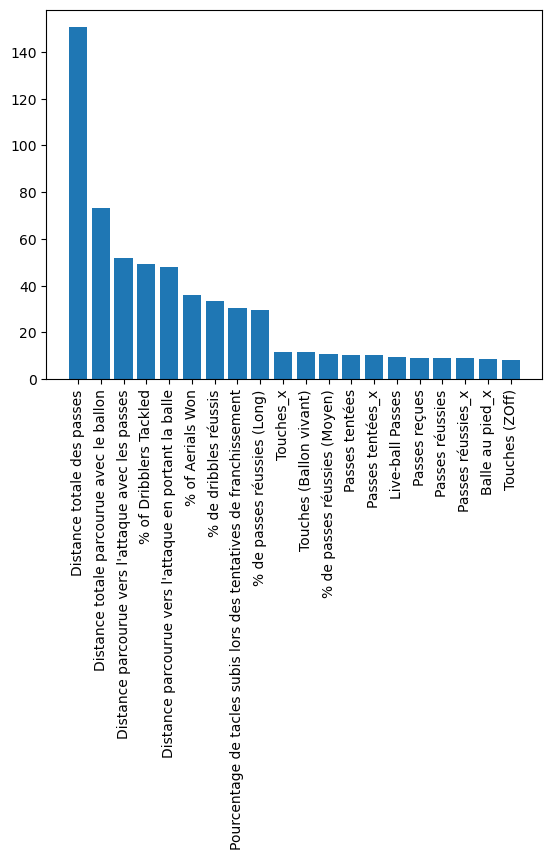

In [17]:
variances=variances.sort_values(by='Attaquant',ascending=False)
plt.bar(variances.head(20).index,variances['Attaquant'].head(20))
plt.xticks(rotation = 'vertical')
plt.show()

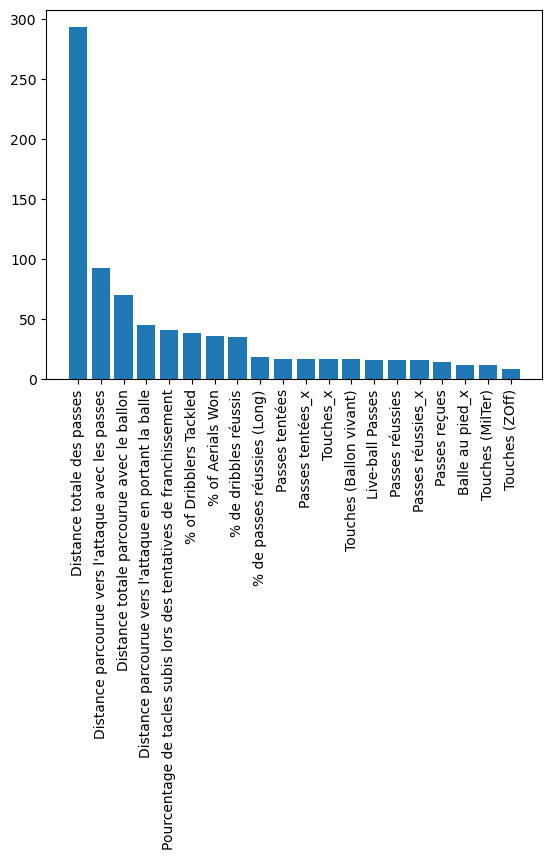

In [18]:
variances=variances.sort_values(by='Milieu',ascending=False)
plt.bar(variances.head(20).index,variances['Milieu'].head(20))
plt.xticks(rotation = 'vertical')
plt.show()

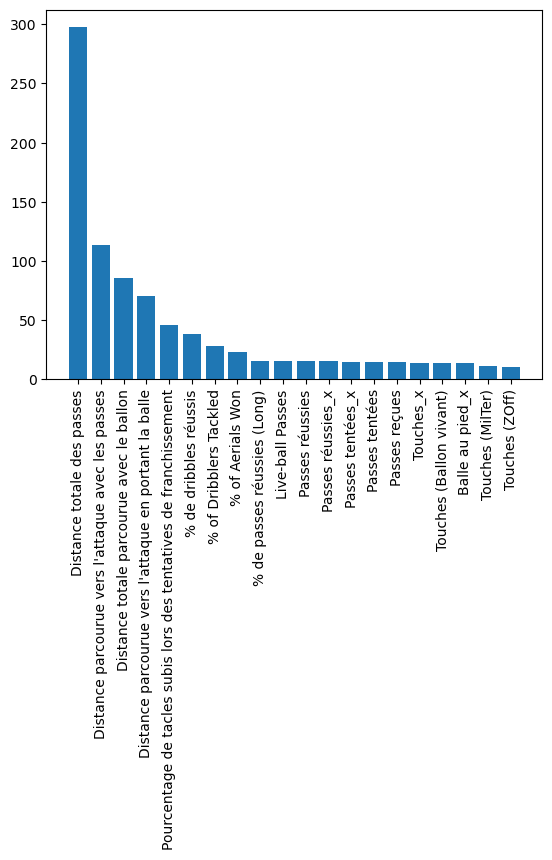

In [19]:
variances=variances.sort_values(by='Défenseur',ascending=False)
plt.bar(variances.head(20).index,variances['Défenseur'].head(20))
plt.xticks(rotation = 'vertical')
plt.show()

### Étape 5 : Modèle

Je mets le modèle temporaire en chargeant des bases.
Comme le merge des deux bases n'est pas encore fait, je le fait là mais infine faudra le placer plus haut

-

In [20]:
base_work = base_work.dropna(subset=['Valeur_Millions'])
print(len(base_work['Joueur'].unique()))

476


### Etude des attaquants

L'étude se fait poste par poste, car les statistiques à prendre en compte pour mesurer la qualité d'un joueur ne sont pas les mêmes selon son poste. On peut supposer qu'un défenseur sera bon s'il est capable de bien tacler les attaquants adverses alors que cela sera de faible utilité pour un attaquant.

On commence donc par la filtrer la base pour ne conserver que les attaquants

In [21]:
base_attaquant = base_work[base_work['Position'] == 'Attaquant']

On crée ensuite une fonction qui permet de récupèrer On crée ensuite une fonction qui permet de récupèrer 

In [22]:
y = base_attaquant['pts_gagnes'].values.reshape(-1,1)

def reg_simple(x,y):
    reg = linear_model.LinearRegression()
    reg.fit(x, y)
    y_pred = reg.predict(x)

    intercept = reg.intercept_
    slope = reg.coef_[0]
    mse = mean_squared_error(y,y_pred)
    r2 = r2_score(y,y_pred)
    
    return intercept, slope, mse, r2

In [23]:
Var_forward = ['Buts', 'Passes décisives_x','Pénaltys marqués', 'Pénaltys tirés', 'Total des tirs ',
       'Shots on Target', 'Cartons jaunes_x', 'Cartons rouges_x', 'Touches_x',
       'Tacles_x', 'Interceptions_x', 'Balles contrées_x','Actions menant à un tir',
       'Actions menant à un but', 'Passes réussies_x', 'Passes tentées_x',
       'Passes progressives_x', 'Balle au pied_x','Possessions progressives_x', 'Dribbles tentés_x', 'Dribbles réussis_x'
       ]

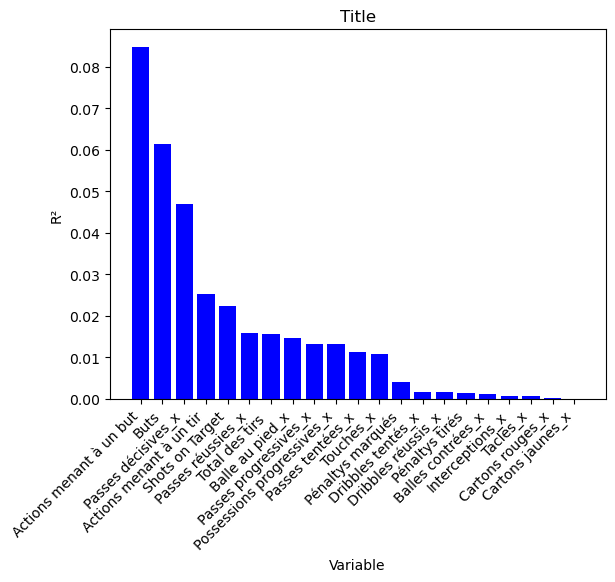

In [24]:
stat_forward = Var_forward
dict_forward = {}
for stat in stat_forward:
    x = base_attaquant[[stat]]
    result_reg = reg_simple(x,y)
    #print(result_reg)
    dict_forward[stat] = result_reg

var = dict_forward.keys()
r2list = [ele[3] for ele in dict_forward.values()]

sorted_data = sorted(zip(var, r2list), key=lambda x: x[1], reverse=True)
var_sorted, r2list_sorted = zip(*sorted_data)

plt.bar(var_sorted, r2list_sorted, color='blue')
plt.xlabel('Variable')
plt.ylabel('R²')
plt.title('Title')
plt.xticks(rotation=45, ha='right')
plt.show()

In [25]:
var_retenues = ['Buts','Passes décisives_x','Shots on Target','Total des tirs ','Passes progressives_x']
x = base_attaquant[var_retenues]
y = base_attaquant['pts_gagnes'].values.reshape(-1,1)
print(reg_simple(x,y))
intercept, coef, _ , _ = reg_simple(x,y)
list_coef = list(coef)

(array([1.16536747]), array([ 0.68630633,  0.75877836, -0.02699539, -0.0013412 ,  0.03567092]), 1.5977386096801767, 0.10360849503785341)


In [26]:
base_attaquant_saison = base_attaquant.groupby('Joueur').agg({'Buts' : 'sum',
                                    'Passes décisives_x' : 'sum', 'Shots on Target' : 'sum',
                                    'Total des tirs ' : 'sum', 'Passes progressives_x' : 'sum', 'Minutes' : 'sum', 'pts_gagnes': 'sum', 'Valeur_Millions' : 'first'}).reset_index()
print(base_attaquant_saison[['Joueur','Minutes']].sort_values(by = 'Minutes', ascending = True))

                 Joueur  Minutes
0    Abdoulaye Doucoure        1
191      Pascal Struijk        1
107          Jamal Lowe        1
125        Joel Veltman        1
132    Junior Stanislas        1
..                  ...      ...
185       Ollie Watkins     3037
50           Danny Ings     3180
30          Bukayo Saka     3181
175       Mohamed Salah     3200
91           Harry Kane     3405

[243 rows x 2 columns]


In [27]:
base_attaquant_saison['pts joueurs'] =  base_attaquant_saison[var_retenues[0]] * list_coef[0] + \
                                        base_attaquant_saison[var_retenues[1]] * list_coef[1] + \
                                        base_attaquant_saison[var_retenues[2]] * list_coef[2] + \
                                        base_attaquant_saison[var_retenues[3]] * list_coef[3] + \
                                        base_attaquant_saison[var_retenues[4]] * list_coef[4] 
base_attaquant_saison = base_attaquant_saison[base_attaquant_saison['Minutes'] >= 900]
base_attaquant_saison['pts joueur par 90'] = base_attaquant_saison['pts joueurs'] * 90  / base_attaquant_saison['Minutes']
print(base_attaquant_saison[['Joueur','pts joueur par 90']].sort_values(by = 'pts joueur par 90', ascending= False))

               Joueur  pts joueur par 90
75     Erling Haaland           1.016029
145  Leandro Trossard           0.781116
31      Callum Wilson           0.772885
175     Mohamed Salah           0.731318
91         Harry Kane           0.731160
..                ...                ...
13     Anthony Gordon           0.167730
164     Matheus Cunha           0.158268
57       Demarai Gray           0.145604
60        Diego Costa           0.056278
180       Neal Maupay           0.056031

[77 rows x 2 columns]


Définition du replacement player

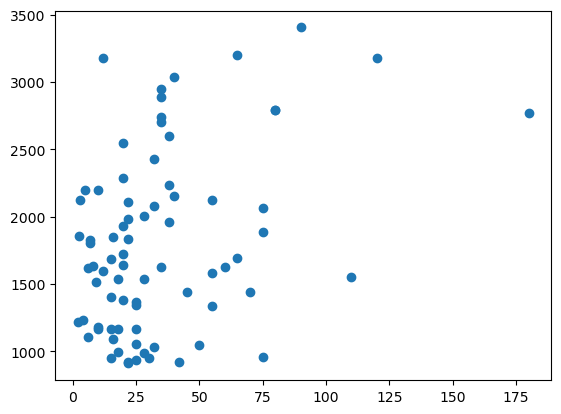

In [28]:
minutes = base_attaquant_saison['Minutes']
value = base_attaquant_saison['Valeur_Millions']

fig, ax = plt.subplots()
ax.scatter(value,minutes)
plt.show()

In [29]:
replacement_attaquant = base_attaquant_saison[(base_attaquant_saison['Valeur_Millions'] <= 10) & (base_attaquant_saison['Valeur_Millions'] >= 1)]

In [30]:
Replacement_performance = replacement_attaquant['pts joueur par 90'].mean()
print(Replacement_performance)

0.27086953975771555


In [31]:
base_attaquant_saison['PAR par 90'] = base_attaquant_saison['pts joueur par 90'] - Replacement_performance
print(base_attaquant_saison[['Joueur','PAR par 90']].sort_values(by = 'PAR par 90',ascending = False))

               Joueur  PAR par 90
75     Erling Haaland    0.745160
145  Leandro Trossard    0.510246
31      Callum Wilson    0.502015
175     Mohamed Salah    0.460448
91         Harry Kane    0.460291
..                ...         ...
13     Anthony Gordon   -0.103140
164     Matheus Cunha   -0.112601
57       Demarai Gray   -0.125265
60        Diego Costa   -0.214592
180       Neal Maupay   -0.214838

[77 rows x 2 columns]


### Étape 6 : Applications du modèle
### Comment aider un manager à construire son équipe

L'objectif de ce modèle simple était de créer une statistique mesurant la performance individuel d'un joueur quelque soit la qualité de l'équipe qui l'entoure. Ainsi nous obtenons le Points Above Replacement qui indique la qualité intrinsèque du joueur. 

La construction de ce modèle répondait au besoin d'une évaluation objective de la qualité d'un joueur. Une application du PAR peut se trouver dans l'aide que cela peut apporter à un manager d'équipe de football, en charge des recrutements et des transferts.

L'idée, popularisée par le manager de l'équipe de baseball d'Oakland au début des années 2000, est de chercher les joueurs qui ont objectivement une grande qualité de jeu mais dont la valeur marchande est sous-évaluée. Cette observation

Nous nous proposons de réaliser cette application.

On commence par créer un graphique qui permet d'observer la relation entre la performance des joueurs, mesurée grâce à notre statistique PAR issue des données FBRef et la valeur marchande des joueurs, issue des donénes TransferMarkt

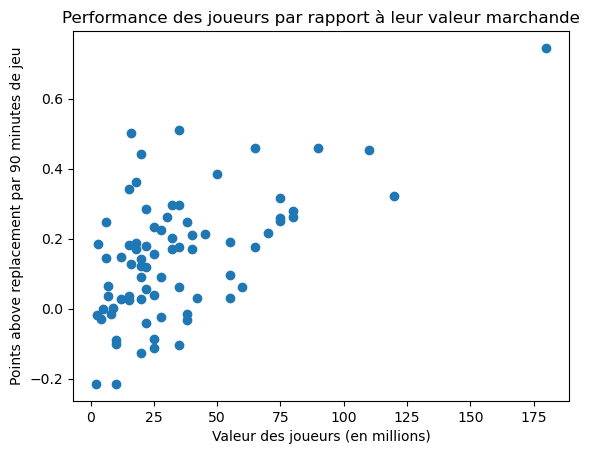

In [32]:
perf = base_attaquant_saison['PAR par 90']
value = base_attaquant_saison['Valeur_Millions']

fig, ax = plt.subplots()
ax.scatter(value,perf)
ax.set_xlabel('Valeur des joueurs (en millions)')
ax.set_ylabel('Points above replacement par 90 minutes de jeu')
ax.set_title('Performance des joueurs par rapport à leur valeur marchande')

plt.show()

On observe une bonne corrélation entre la valeur d'un joueur et sa performance mesurée grâce à la statistique PAR. Cette observation est rassurante dans un premier temps car on imagine bien que les spécialistes du football sont capables de discerner dans les grandes lignes la qualité d'un joueur et que la valeur marchande du joueur reflète en partie cette qualité. Notre statitisque PAR n'est donc pas complètement absurde.

Mais 

In [33]:
base_attaquant_saison['PAR par Millions'] = base_attaquant_saison['PAR par 90'] * 38 / base_attaquant_saison['Valeur_Millions']
print(base_attaquant_saison[['Joueur','PAR par 90','Valeur_Millions','PAR par Millions']].sort_values(by = 'PAR par Millions',ascending = False).head(10))

                Joueur  PAR par 90  Valeur_Millions  PAR par Millions
240            Willian    0.183886              3.0          2.329217
208            Rodrigo    0.247231              6.0          1.565797
31       Callum Wilson    0.502015             16.0          1.192286
34     Carlos Vinicius    0.145617              6.0          0.922242
14     Anthony Martial    0.341979             15.0          0.866348
206       Riyad Mahrez    0.442218             20.0          0.840214
137  Kelechi Iheanacho    0.363075             18.0          0.766492
145   Leandro Trossard    0.510246             35.0          0.553981
225        Solly March    0.285414             22.0          0.492989
50          Danny Ings    0.146783             12.0          0.464814
